In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
BTCUSD_1H = pd.read_csv('../data/Binance_BTCUSDT_1h.csv', skiprows=1)

In [4]:
ETHUSD_1H = pd.read_csv('../data/Binance_ETHUSDT_1h.csv', skiprows=1)

low and high are different for different rolling averages, therefore, there should be 2 segment-paris (or 4 segments for:
    - bull low v ra
    - bull high v ra
    - bear low v ra
    - bear high v ra
    )
    
e.g. in a bull market, low ticker vs rolling average of X (this X needs to be found)
(expect abs(low-ra | bull) < abs(low-ra | bear)  :: absolute value of low minus ra give bull => abs(low-ra | bull)

### Functions

In [5]:
def bear_or_bull(df):
    """
    Add a column to decide if the row was bear or bull:
    logic:
    
    Bull if : open_value <= close_value
    Bear if : open_value > close_value
    
    INPUT: 
    - df with column 'open' and 'close' value
    
    OUTPUT:
    - df with an extra column labelled 'Bear' or 'Bull'
    """
    
    
    df['open - close'] = df['open'] - df['close']
    
    df['BullBear'] = df['open - close'].apply(lambda x: 'Bull' if x <= 1 else 'Bear')
    
    del df['open - close']
    
    return df

In [6]:
def get_high_low_dif(df, open_col = 'open', high_col = 'high', low_col = 'low'):
    """
    Add columns to calculate:
    high_dif : percentage of high (high - open)/open
    low_dif : percentage of low (low - open)/open
    
    INPUT:
    - df: dataframe
    - open_col : name of column open open price (default: 'open')
    - high_col : name of column open open price (default: 'high')
    - low_col : name of column open open price (default: 'low')
    
    OUTPUT:
    dataframe with extra columns of
    
    high_dif : percentage of high (high - open)/open
    low_dif : percentage of low (low - open)/open 
    """
    
    df['high_dif'] = 100 * (df[high_col] - df[open_col])/df[open_col]
    df['low_dif'] = 100 * (df[low_col] - df[open_col])/df[low_col]
    
    return df

In [24]:
def add_rolling_average(df, column, n):
    """
    Add a rolling average column
    !! important: code is shifting 1 row back in order to prevent look ahead!!
    
    INPUT:
    - df : dataframe
    - column : column to calculated rolling average on
    - n : number of rows
    
    OUTPUT:
    - dataframe with added column
    
    """
    
    df['last_{col}_ra_{n}H'.format(col=column, n=n)] = df[column].rolling(n).mean().shift(1)
    
    print('adding rolling average for {col} of {n} hours'.format(col=column, n=n))
    
    return df

In [8]:
date_name_conver = {'01-AM': '01:00:00',
 '01-PM': '13:00:00',
 '02-AM': '02:00:00',
 '02-PM': '14:00:00',
 '03-AM': '03:00:00',
 '03-PM': '15:00:00',
 '04-AM': '04:00:00',
 '04-PM': '16:00:00',
 '05-AM': '05:00:00',
 '05-PM': '17:00:00',
 '06-AM': '06:00:00',
 '06-PM': '18:00:00',
 '07-AM': '07:00:00',
 '07-PM': '19:00:00',
 '08-AM': '08:00:00',
 '08-PM': '20:00:00',
 '09-AM': '09:00:00',
 '09-PM': '21:00:00',
 '10-AM': '10:00:00',
 '10-PM': '22:00:00',
 '11-AM': '11:00:00',
 '11-PM': '23:00:00',
 '12-AM': '00:00:00',
 '12-PM': '12:00:00',
 '00:00:00' : '00:00:00',
 '01:00:00' : '01:00:00',
 '02:00:00' : '02:00:00',
 '03:00:00' : '03:00:00',
 '04:00:00' : '04:00:00',
 '05:00:00' : '05:00:00',
 '06:00:00' : '06:00:00',
 '07:00:00' : '07:00:00',
 '08:00:00' : '08:00:00',
 '09:00:00' : '09:00:00',
 '10:00:00' : '10:00:00',
 '11:00:00' : '11:00:00',
 '12:00:00' : '12:00:00',
 '13:00:00' : '13:00:00',
 '14:00:00' : '14:00:00',
 '15:00:00' : '15:00:00',
 '16:00:00' : '16:00:00',
 '17:00:00' : '17:00:00',
 '18:00:00' : '18:00:00',
 '19:00:00' : '19:00:00',
 '20:00:00' : '20:00:00',
 '21:00:00' : '21:00:00',
 '22:00:00' : '22:00:00',
 '23:00:00' : '23:00:00'}

In [9]:
### without RA (take RA as 1)

In [10]:
ETHUSD_1H['date'] = ETHUSD_1H['date'].apply(lambda x: x.split(' ')[0] + ' '+ date_name_conver[x.split(' ')[1]])

In [11]:
ETHUSD_1H = ETHUSD_1H.sort_values(by = 'date', ascending=True)

In [12]:
ETHUSD_1H = bear_or_bull(ETHUSD_1H)

In [13]:
ETHUSD_1H = get_high_low_dif(ETHUSD_1H)

In [14]:
ETHUSD_1H

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount,BullBear,high_dif,low_dif
32420,1.502942e+09,2017-08-17 04:00:00,ETH/USDT,652.74,652.74,298.00,300.79,122.52000,3.673684e+04,NaN,Bear,0.000000,-119.040268
32419,1.502946e+09,2017-08-17 05:00:00,ETH/USDT,301.61,303.28,300.00,303.10,377.67000,1.140433e+05,NaN,Bull,0.553695,-0.536667
32418,1.502950e+09,2017-08-17 06:00:00,ETH/USDT,303.10,304.44,301.90,302.68,302.51000,9.162268e+04,NaN,Bull,0.442098,-0.397483
32417,1.502953e+09,2017-08-17 07:00:00,ETH/USDT,302.68,307.96,302.60,307.96,753.19000,2.292483e+05,NaN,Bull,1.744417,-0.026438
32416,1.502957e+09,2017-08-17 08:00:00,ETH/USDT,307.96,309.97,307.00,308.62,150.75000,4.655946e+04,NaN,Bull,0.652682,-0.312704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.610136e+12,2021-01-08 20:00:00,ETH/USDT,1184.75,1195.50,1143.16,1145.90,140396.82392,1.635283e+08,104529.0,Bear,0.907364,-3.638161
3,1.610140e+12,2021-01-08 21:00:00,ETH/USDT,1146.34,1193.89,1135.51,1193.63,80549.78913,9.427986e+07,64165.0,Bull,4.147984,-0.953756
2,1.610143e+12,2021-01-08 22:00:00,ETH/USDT,1193.63,1220.00,1166.31,1216.58,50087.21190,5.991233e+07,66842.0,Bull,2.209227,-2.342430
1,1.610147e+12,2021-01-08 23:00:00,ETH/USDT,1216.85,1229.69,1208.38,1216.93,44604.88318,5.435946e+07,52310.0,Bull,1.055183,-0.700938


In [15]:
ETHUSD_1H.head(10000).describe()

,unix,open,high,low,close,Volume ETH,Volume USDT,tradecount,high_dif,low_dif
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,0.0,10000.000000,10000.000000
mean,1.520954e+09,515.975559,521.024340,510.481171,515.935195,5390.994133,2.586784e+06,NaN,0.923777,-1.004285
std,1.039483e+07,252.596788,256.075827,248.546817,252.621352,6893.664039,2.956861e+06,NaN,1.169369,2.010035
min,1.502942e+09,170.550000,171.500000,144.210000,170.550000,0.000000,0.000000e+00,NaN,0.000000,-119.040268
25%,1.511956e+09,302.952500,305.417500,300.560000,302.970000,904.565000,3.900786e+05,NaN,0.246950,-1.208576
50%,1.520955e+09,457.125000,461.245000,453.500000,457.075000,3315.455000,1.960764e+06,NaN,0.599649,-0.596181
75%,1.529954e+09,682.400000,689.000000,676.167500,682.400000,6907.187500,3.581649e+06,NaN,1.171609,-0.234851
max,1.538953e+09,1431.010000,1440.000000,1395.780000,1431.010000,102385.390000,3.868189e+07,NaN,18.633820,0.000000


In [16]:
ETHUSD_1H.head(50000).describe()

,unix,open,high,low,close,Volume ETH,Volume USDT,tradecount,high_dif,low_dif
count,3.242100e+04,32421.000000,32421.000000,32421.000000,32421.000000,32421.000000,3.242000e+04,3837.000000,32421.000000,32421.000000
mean,1.911115e+11,338.760417,341.436933,335.856884,338.781890,20179.348060,6.640785e+06,20719.657024,0.703329,-0.761827
std,5.173850e+11,218.919936,221.637489,215.867396,218.974487,26752.414431,1.311331e+07,18659.073939,0.935899,1.382825
min,1.502942e+09,82.170000,82.950000,81.790000,82.170000,0.000000,0.000000e+00,0.000000,0.000000,-119.040268
25%,1.532135e+09,181.720000,182.600000,180.600000,181.720000,4976.330000,1.334618e+06,10082.000000,0.188249,-0.910695
50%,1.561313e+09,275.010000,277.270000,273.020000,275.010000,12057.600000,3.058093e+06,15006.000000,0.436619,-0.447099
75%,1.590491e+09,414.000000,416.610000,411.540000,414.000000,25485.608660,7.140515e+06,24200.000000,0.870185,-0.191765
max,1.610150e+12,1431.010000,1440.000000,1395.780000,1431.010000,463034.330000,3.940814e+08,179717.000000,24.404885,0.000000


In [17]:
ETHUSD_1H[ETHUSD_1H['BullBear']=='Bull'].head(5000).describe()

,unix,open,high,low,close,Volume ETH,Volume USDT,tradecount,high_dif,low_dif
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,0.0,5000.000000,5000.000000
mean,1.517091e+09,549.773672,557.403672,546.758136,554.391446,3110.186131,2.071286e+06,NaN,1.302613,-0.543814
std,8.448475e+06,245.538805,250.672873,243.790424,249.071900,3804.023206,2.871035e+06,NaN,1.401228,1.507213
min,1.502946e+09,199.280000,207.890000,144.210000,202.040000,0.000000,0.000000e+00,NaN,0.000000,-94.161293
25%,1.509657e+09,328.075000,331.350000,326.697500,329.922500,412.842500,1.274788e+05,NaN,0.509462,-0.690389
50%,1.516822e+09,477.465000,483.980000,475.100000,481.635000,2145.855000,1.317764e+06,NaN,0.931845,-0.336957
75%,1.524464e+09,703.585000,712.455000,699.827500,709.250000,4370.427500,2.826632e+06,NaN,1.623021,-0.116452
max,1.531714e+09,1396.020000,1440.000000,1392.950000,1431.010000,41937.320000,3.868189e+07,NaN,18.633820,0.000000


In [18]:
ETHUSD_1H[ETHUSD_1H['BullBear']=='Bear'].head(5000).describe()

,unix,open,high,low,close,Volume ETH,Volume USDT,tradecount,high_dif,low_dif
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,0.0,5000.000000,5000.000000
mean,1.530973e+09,452.734398,454.699042,444.063640,447.032058,11655.907506,3.582597e+06,NaN,0.393305,-1.897753
std,1.912801e+07,275.948389,277.543747,269.299134,271.823327,16155.324121,3.758605e+06,NaN,0.527154,2.366523
min,1.502942e+09,85.030000,85.760000,82.830000,83.280000,3.100000,8.759800e+02,NaN,0.000000,-119.040268
25%,1.516010e+09,241.867500,242.870000,237.127500,238.882500,2303.197500,1.278852e+06,NaN,0.075886,-2.217302
50%,1.527014e+09,357.835000,359.760000,351.155000,353.290000,6068.710000,2.683158e+06,NaN,0.229975,-1.363288
75%,1.543226e+09,614.147500,616.082500,603.482500,607.462500,15011.440000,4.645645e+06,NaN,0.519313,-0.898354
max,1.572991e+09,1431.010000,1432.000000,1395.780000,1401.360000,246065.280000,3.631706e+07,NaN,7.551000,-0.124850


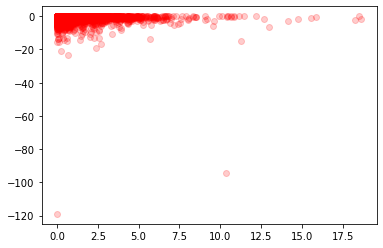

In [19]:
plt.scatter(x=ETHUSD_1H.head(10000)['high_dif'], y= ETHUSD_1H.head(10000)['low_dif'] , alpha = 0.2, c='red')

In [20]:
for ra in [2, 3, 5, 10, 20]:
    ETHUSD_1H = add_rolling_average(ETHUSD_1H, 'open', ra)
    ETHUSD_1H = add_rolling_average(ETHUSD_1H, 'close', ra)

adding rolling average for open of 2 hours
adding rolling average for close of 2 hours
adding rolling average for open of 3 hours
adding rolling average for close of 3 hours
adding rolling average for open of 5 hours
adding rolling average for close of 5 hours
adding rolling average for open of 10 hours
adding rolling average for close of 10 hours
adding rolling average for open of 20 hours
adding rolling average for close of 20 hours


In [21]:
for ra in [2, 3, 5, 10, 20]:
    ETHUSD_1H = add_rolling_average(ETHUSD_1H, 'open', ra)

adding rolling average for open of 2 hours
adding rolling average for open of 3 hours
adding rolling average for open of 5 hours
adding rolling average for open of 10 hours
adding rolling average for open of 20 hours


In [25]:
ETHUSD_1H['middle_price'] = (ETHUSD_1H['open'] + ETHUSD_1H['close'])/2

In [27]:
ETHUSD_1H = add_rolling_average(ETHUSD_1H, 'middle_price', 5)

adding rolling average for middle_price of 5 hours


In [28]:
ETHUSD_1H

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount,...,last_open_ra_3H,last_close_ra_3H,last_open_ra_5H,last_close_ra_5H,last_open_ra_10H,last_close_ra_10H,last_open_ra_20H,last_close_ra_20H,middle_price,last_middle_price_ra_5H
32420,1.502942e+09,2017-08-17 04:00:00,ETH/USDT,652.74,652.74,298.00,300.79,122.52000,3.673684e+04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476.765,NaN
32419,1.502946e+09,2017-08-17 05:00:00,ETH/USDT,301.61,303.28,300.00,303.10,377.67000,1.140433e+05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.355,NaN
32418,1.502950e+09,2017-08-17 06:00:00,ETH/USDT,303.10,304.44,301.90,302.68,302.51000,9.162268e+04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.890,NaN
32417,1.502953e+09,2017-08-17 07:00:00,ETH/USDT,302.68,307.96,302.60,307.96,753.19000,2.292483e+05,NaN,...,419.150000,302.190000,NaN,NaN,NaN,NaN,NaN,NaN,305.320,NaN
32416,1.502957e+09,2017-08-17 08:00:00,ETH/USDT,307.96,309.97,307.00,308.62,150.75000,4.655946e+04,NaN,...,302.463333,304.580000,NaN,NaN,NaN,NaN,NaN,NaN,308.290,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.610136e+12,2021-01-08 20:00:00,ETH/USDT,1184.75,1195.50,1143.16,1145.90,140396.82392,1.635283e+08,104529.0,...,1208.453333,1194.346667,1219.844,1205.406,1232.735,1229.067,1204.1215,1202.1000,1165.325,1212.625
3,1.610140e+12,2021-01-08 21:00:00,ETH/USDT,1146.34,1193.89,1135.51,1193.63,80549.78913,9.427986e+07,64165.0,...,1194.296667,1171.173333,1205.408,1191.232,1229.059,1218.526,1202.1160,1200.2470,1169.985,1198.320
2,1.610143e+12,2021-01-08 22:00:00,ETH/USDT,1193.63,1220.00,1166.31,1216.58,50087.21190,5.991233e+07,66842.0,...,1171.213333,1174.760000,1191.290,1184.514,1218.546,1212.346,1200.2620,1200.7025,1205.105,1187.902
1,1.610147e+12,2021-01-08 23:00:00,ETH/USDT,1216.85,1229.69,1208.38,1216.93,44604.88318,5.435946e+07,52310.0,...,1174.906667,1185.370000,1184.572,1184.746,1212.385,1209.014,1200.7175,1205.9645,1216.890,1184.659
